<a href="https://colab.research.google.com/github/sooonsyk/ESAA/blob/main/Week17_HW1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**군집화**
##**K-평균 알고리즘 이해**
- K-평균 : 군집 중심 centroid이라는 특정한 임의의 지점을 선책해 해당 중심에 가장 가까운 포인트들을 선택하는 군집화 기법
- 군집 중심점 : 선택된 포인트의 평균 지점으로 이동하고 이동된 중심점에서 다시 가까운 포인트를 선택, 다시 중심점을 평균 지점으로 이동하는 프로세스 반복적으로 수행
  - 모든 데이터 포인트에서 더이상 중심점의 이동이 없을 경우에 반복을 멈추고 해당 중심점에 속하는 데이터 포인트들을 군집화하는 기법
- 장점 : 가장 많이 활용되고 쉽고 간결함
- 단점 : 거리 기반 알고리즘으로 속성의 개수가 매우 많을 경우 군집화 정확도가 떨어짐 - 이를 위해 PCA로 차원 감소를 적용해야 할 수도 있음, 반복 횟수가 많을 경우 수행 시간이 매우 느려짐, 몇개의 군집을 선택해야할지 가이드하기 어려움

###**사이킷런 KMeans 클래스 소개**
- 사이킷런 패키지는 K-평균을 구현하기 위해 KMeans 클래스 제공
- class sklearn.cluster.KMeans(n_clusters=8, init='k-means++', n_init=10, max_iter=300, tol=0.0001, precompute_distances='auto', verbose=0, random_state=None, copy_x=True, n_jobs=1, algorithm='auto') 이와 같은 초기화 파라미터 가짐
  - 가장 중요한 파라미터 n_clusters로 군집화할 개수, 군집 중심점의 개수 의미
  - init 은 초기에 군집 중심점의 좌쵸를 설정할 방식 의미, 보통 임의로 중심을 설정하지 않고 k-means++ 방식으로 최초 설정
  - max_iter는 최대 반복 횟수이며, 이 횟수 이전에 모든 데이터의 중심점 이동이 없으면 종료
- 사이킷런의 비지도학습 클래스와 마찬가지로 fit(데이터 세트) 또는 fit_transform(데이터 세트) 메서드 이용해 수행
- 수행된 KMeans 객체는 군집화 수행이 완료돼 관련된 주요 속성 알 수 있음
  - labels_ : 각 데이터 포인트가 속한 군집 중심점 레이블
  - cluster_centers_ : 각 군집 중심점 좌표(Shape는 [군집 개수, 피처 개수])
  
###**K-평균을 이용한 붓꽃 데이터 세트 군집화**
- 붓꽃의 꽃받침 sepal 과 꽃잎 petal 길이와 너비에 따른 품종을 분류하는 데이터 세트


In [ ]:
from sklearn.preprocessing import scale
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

iris = load_iris()
#더 편리한 데이터 핸들링을 위해 DataFrame으로 변환
irisDF = pd.DataFrame(data=iris.data, columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])
irisDF.head(3)

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


In [ ]:
#3개 그룹으로 군집화
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, random_state=0)
kmeans.fit(irisDF)

KMeans(n_clusters=3, random_state=0)

In [ ]:
#군집화 수행 결과가 kmeans 객체 변수로 반환됨
#labels_ 속성 확인해보면 각 데이터가 어떤 중심에 속하는지를 알 수 있음
print(kmeans.labels_)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


- 0,1,2 각각 첫번째, 두번째, 세번째 군집에 속함을 의미
- 실제 붓꽃 품종 분류값과 얼마나 차이가 나는지 확인해보기 위해 붓꽃 데이터 세트의 target값을 'target' 칼럼으로, 앞에서 구한 labels_ 값을 'cluster' 칼럼으로 지정해 irisDF 에 추가한 뒤에 group by 연산을 실제 분류값인 target과 군집화 분류값인 cluster레벨로 적용해 target과 cluster 값 개수 비교할 수 있음

In [ ]:
irisDF['target'] = iris.target
irisDF['cluster'] = kmeans.labels_
iris_result = irisDF.groupby(['target', 'cluster'])['sepal_length'].count()
print(iris_result)

target  cluster
0       1          50
1       0          48
        2           2
2       0          14
        2          36
Name: sepal_length, dtype: int64


In [ ]:
#2차원 평면에 시각화 - 속성 4개라 적합하지 않으므로 PCA 이용해 4개의 속성을 2개로 차원 축소한 다음에 X,Y 좌표로 개별 데이터 표현
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_transformed = pca.fit_transform(iris.data)

irisDF['pca_x'] = pca_transformed[:,0]  #X좌표값
irisDF['pca_y'] = pca_transformed[:,1]  #Y좌표값
irisDF.head(3)

,sepal_length,sepal_width,petal_length,petal_width,target,cluster,pca_x,pca_y
0,5.1,3.5,1.4,0.2,0,1,-2.684126,0.319397
1,4.9,3.0,1.4,0.2,0,1,-2.714142,-0.177001
2,4.7,3.2,1.3,0.2,0,1,-2.888991,-0.144949


<function matplotlib.pyplot.show>

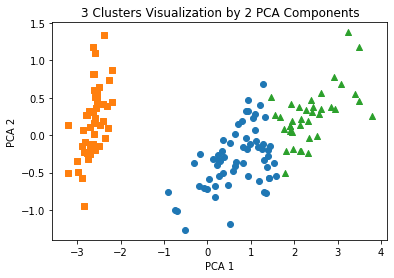

In [ ]:
#군집값이 0,1,2인 경우마다 별도의 인덱스로 추출
marker0_ind = irisDF[irisDF['cluster']==0].index
marker1_ind = irisDF[irisDF['cluster']==1].index
marker2_ind = irisDF[irisDF['cluster']==2].index

#군집 값 0,1,2에 해당하는 인덱스로 각 군집 레벨의 pca_x, pca_y 값 추출, o,s,^로 마커 표시
#맷플롯립의 산점도는 서로 다른 마커를 한 번에 표현할 수 없으므로 마커별로 별도의 산점도 수행
plt.scatter(x=irisDF.loc[marker0_ind,'pca_x'], y=irisDF.loc[marker0_ind,'pca_y'],marker='o') #동그라미
plt.scatter(x=irisDF.loc[marker1_ind,'pca_x'], y=irisDF.loc[marker1_ind,'pca_y'],marker='s') #네모
plt.scatter(x=irisDF.loc[marker2_ind,'pca_x'], y=irisDF.loc[marker2_ind,'pca_y'],marker='^') #세모

plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('3 Clusters Visualization by 2 PCA Components')
plt.show


###**군집화 알고리즘 테스트를 위한 데이터 생성**
- 사이킷런은 다양한 유형의 군집화 알고리즘을 테스트해보기 위한 간단한 데이터 생성기 제공
- 대표적으로 make_blobs()와 make_classification() API 있음, 여러 개의 클래스에 해당하는 데이터 세트를 만들고 하나의 클래스에 여러 개의 군집이 분포될 수 있게 데이터 생성할 수 있음, 분류 용도로도 테스트 데이터 생성 가능
  - make_blobs() 는 개별 군집의 중심점과 표준 편차 제어 기능 추가돼있음
  - make_classification() 는 노이지를 포함한 데이터를 만드는데 유용하게 사용
-make_blobs() : 피처 데이터 세트와 타깃 데이터 세트가 튜플로 반환됨
  - n_samples : 생성할 총 데이터 개수, 디폴트 100
  - n_features : 데이터 피처 개수, 시각화를 목표로 할 경우 2개로 설정해 보통 첫번째를 x로 두번째를 y로 표현
  - centers : int값으로 설정하면 군집의 개수, ndarray로 표현하면 개별 군집 중심점의 좌표 의미
  - cluster_std : 생성될 군집 데이터의 표준 편차 의미

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
%matplotlib inline

X,y = make_blobs(n_samples=200, n_features=2, centers=3, cluster_std=0.8, random_state=0)
print(X.shape, y.shape)

#y target 값의 분포 확인
unique, counts = np.unique(y, return_counts=True)
print(unique, counts)

(200, 2) (200,)
[0 1 2] [67 67 66]


In [ ]:
#데이터 가공 편리하게 하기 위해 DataFrame으로 변환
import pandas as pd

clusterDF = pd.DataFrame(data=X, columns=['ftr1', 'ftr2'])
clusterDF['target'] = y
clusterDF.head(3)

,ftr1,ftr2,target
0,-1.692427,3.622025,2
1,0.697940,4.428867,0
2,1.100228,4.606317,0


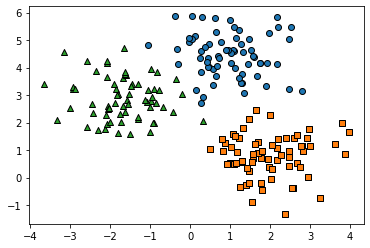

In [ ]:
#시각화
target_list = np.unique(y)
#각 타깃별 산점도의 마커값
markers = ['o','s','^','P','D','H','x']
#3개의 군집 영역으로 구분한 데이터 세트를 생성했으므로 target_list는 [0,1,2]
#target==0, target==1, target==2로 scatter plot 을 marker 별로 생성
for target in target_list:
  target_cluster = clusterDF[clusterDF['target']==target]
  plt.scatter(x=target_cluster['ftr1'], y=target_cluster['ftr2'], edgecolor='k', marker=markers[target])
plt.show()

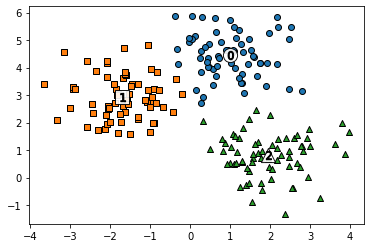

In [ ]:
#KMeans 군집화 수행한 뒤에 군집별로 시각화
#KMeans 객체를 이용해 X데이터를 K-Means 클러스터링 수행
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=200, random_state=0)
cluster_labels = kmeans.fit_predict(X) #X데이터 군집화
clusterDF['kmeans_label'] = cluster_labels

#cluster_centers_ 는 개별 클러스터의 중심 위치 좌표 시각화를 위해 추출
centers = kmeans.cluster_centers_
unique_labels = np.unique(cluster_labels)

markers = ['o','s','^','P','D','H','x']

#군집된 label 유형별로 iteration 하면서 marker 별로 scatter plot 수행
for label in unique_labels:
  label_cluster = clusterDF[clusterDF['kmeans_label']==label]
  center_x_y = centers[label]
  plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], edgecolor='k', marker=markers[label])

  #군집별 중심 위치 좌표 시각화
  plt.scatter(x=center_x_y[0], y=center_x_y[1], s=200, color='white', alpha=0.9, edgecolor='k', marker=markers[label])
  plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k', edgecolor='k', marker='$%d$'%label)

plt.show()

In [ ]:
print(clusterDF.groupby('target')['kmeans_label'].value_counts())  #단지 군집 번호이므로 서로 다른 값으로 매핑될 수 있음

target  kmeans_label
0       0               66
        1                1
1       2               67
2       1               65
        2                1
Name: kmeans_label, dtype: int64


- cluster_std 파라미터로 데이터의 분포도 조절, 작을수록 군집 중심에 데이터가 모여있음

##**군집 평가 Cluster Evaluation**
- 대부분의 군집화 데이터 세트는 비교할 만한 타깃 레이블을 가지고 있지 않음
- 군집화는 분류와 유사해보일 수 잇으나 성격이 많이 다름

###**실루엣 분석의 개요**
- 각 군집 간의 거리가 얼마나 효율적으로 분리돼 있는지 나타냄 - 다른 군집과는 떨어져있고 동일 군집끼리의 데이터는 서로 가깝게
- 실루엣 계수 기반 - 개별 데이터가 가지는 군집화 지표, 해당 데이터가 같은 군집 내의 데이터와 얼마나 가깝게 군집화돼있고, 다른 군집에 있는 데이터와는 얼마나 멀리 분리돼 있는지를 나타내는 지표
  - a(i) : 해당 데이터 포인트와 같은 군집 내에 있는 다른 데이터 포인트와의 거리를 평균한 값
  - b(i) : 해당 데이터 포인트가 속하지 않은 군집 중 가장 가까운 군집과의 평균 거리
  - b(i)-a(i) 를 정규화하기 위해 MAX(a(i),b(i)) 값으로 나눔
  - -1~1 사이의 값을 가지며 1로 가까워질수록 근처의 군집과 더 멀리 떨어져있다는 것이고 0에 가까울수록 근처의 군집과 가까워진다는 것, -값은 아예 다른 군집에 데이터 포인트가 할당됐음을 의미
- sklearn.metrics.silhouette_samples(X, labels, metric='euclidean',**kwds) : 인자로 X feature 데이터 세트와 각 피처 데이터 세트가 속한 군집 레이블 값인 labels 데이터를 입력해주면 각 데이터 포인트의 실루엣 계수를 계산해 반환
- sklearn.metrics.silhouette_score(X, labels, metric='euclidean', sample_size=None, **kwds) : 인자로 X_feature 데이터 세트와 각 피처 데이터 세트가 속한 군집 레이블 값인 labels 데이터를 입력해주면 전체 데이터의 실루엣 계수 값을 평균해 반환함, 일반적으로 이 값이 높을 수록 군집화가 어느 정도 잘 됐다고 판단할 수 있지만 무조건은 아님
- 좋은 군집화가 되려면
  1. 전체 실루엣 계수의 평균값은 0~1사이값 가지면 1에 가까울 수록 좋음
  2. 하지만 전체 실루엣계수의 평균값과 더불어 개별 군집의 평균값의 편차가 크지 않아야 함

###**붓꽃 데이터 세트를 이용한 군집 평가**


In [ ]:
from sklearn.preprocessing import scale
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans

#실루엣 분석 평가 지표 값을 구하기 위한 API 추가
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

iris = load_iris()
feature_names = ['sepal_length', 'sepal_width', 'petal_length','petal_width']
irisDF = pd.DataFrame(data=iris.data, columns=feature_names)
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, random_state=0).fit(irisDF)
irisDF['cluster'] = kmeans.labels_

#iris의 모든 개별 데이터에 실루엣 계수 값을 구함
score_samples = silhouette_samples(iris.data, irisDF['cluster'])
print('silhouette_samples() return 값의 shape', score_samples.shape)

#irisDF에 실루엣 계수 칼럼 추가
irisDF['silhouette_coeff'] = score_samples

#모든 데이터의 평균 실루엣 계수 값을 구함
average_score = silhouette_score(iris.data, irisDF['cluster'])
print('붓꽃 데이터 세트 Silhouertte Analysis Score : {0:.3f}'.format(average_score))
irisDF.head(3)

silhouette_samples() return 값의 shape (150,)
붓꽃 데이터 세트 Silhouertte Analysis Score : 0.553


,sepal_length,sepal_width,petal_length,petal_width,cluster,silhouette_coeff
0,5.1,3.5,1.4,0.2,1,0.852955
1,4.9,3.0,1.4,0.2,1,0.815495
2,4.7,3.2,1.3,0.2,1,0.829315


In [ ]:
#군집별 평균 실루엣 계수값
irisDF.groupby('cluster')['silhouette_coeff'].mean()

cluster
0    0.417320
1    0.798140
2    0.451105
Name: silhouette_coeff, dtype: float64

###**군집별 평균 실루엣 계수의 시각화를 통한 군집 개수 최적화 방법**
- 전체 데이터의 평균 실루엣 계수 값이 높다고 해서 반드시 최적의 군집 개수로 군집화가 잘 됐다고 볼 수 없음, 특정 군집 내의 실루엣 계수 값만 너무 높고 다른 군집은 내부 데이터끼리의 거리가 너무 떨어져 있어 실루엣 계수 값이 낮아져도 평균적으로 높은 값을 가질 수 있음
- visualize_silhouette() 은 내부 파라미터로 여러개의 군집 개수를 리스트로 가지는 첫번째 파라미터와 피처 데이터 세트인 두번째 파라미터를 가짐
  - 만약 피처 데이터 세트에 대해서 군집이 2,3,4,5 개일 때의 군집별 평균 실루엣 계수 값을 알고 싶다면 visualize_silhouette([2,3,4,5], X_features) 이렇게 호출하면 됨

In [ ]:
### 여러개의 클러스터링 갯수를 List로 입력 받아 각각의 실루엣 계수를 면적으로 시각화한 함수 작성
def visualize_silhouette(cluster_lists, X_features): 

    from sklearn.datasets import make_blobs
    from sklearn.cluster import KMeans
    from sklearn.metrics import silhouette_samples, silhouette_score

    import matplotlib.pyplot as plt
    import matplotlib.cm as cm
    import math

    # 입력값으로 클러스터링 갯수들을 리스트로 받아서, 각 갯수별로 클러스터링을 적용하고 실루엣 개수를 구함
    n_cols = len(cluster_lists)

    # plt.subplots()으로 리스트에 기재된 클러스터링 수만큼의 sub figures를 가지는 axs 생성 
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)

    # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 실루엣 개수 시각화
    for ind, n_cluster in enumerate(cluster_lists):

        # KMeans 클러스터링 수행하고, 실루엣 스코어와 개별 데이터의 실루엣 값 계산. 
        clusterer = KMeans(n_clusters = n_cluster, max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(X_features)

        sil_avg = silhouette_score(X_features, cluster_labels)
        sil_values = silhouette_samples(X_features, cluster_labels)

        y_lower = 10
        axs[ind].set_title('Number of Cluster : '+ str(n_cluster)+'\n' \
                          'Silhouette Score :' + str(round(sil_avg,3)) )
        axs[ind].set_xlabel("The silhouette coefficient values")
        axs[ind].set_ylabel("Cluster label")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([0, len(X_features) + (n_cluster + 1) * 10])
        axs[ind].set_yticks([])  # Clear the yaxis labels / ticks
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])

        # 클러스터링 갯수별로 fill_betweenx( )형태의 막대 그래프 표현. 
        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels==i]
            ith_cluster_sil_values.sort()

            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values, \
                                facecolor=color, edgecolor=color, alpha=0.7)
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10

        axs[ind].axvline(x=sil_avg, color="red", linestyle="--")

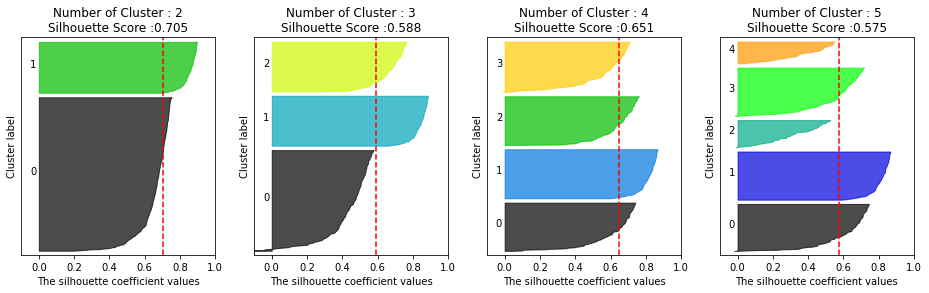

In [ ]:
#make_blobs를 통해 군집화를 위한 4개의 군집 중심의 500개 2차원 데이터 세트 생성
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=500, n_features=2, centers=4, cluster_std=1, center_box=(-10.0, 10.0), shuffle=True, random_state=1)

#군집 개수가 2,3,4,5개일 때의 군집별 실루엣 계수 평균값을 시각화
visualize_silhouette([2,3,4,5], X)

#4가 좋아보임

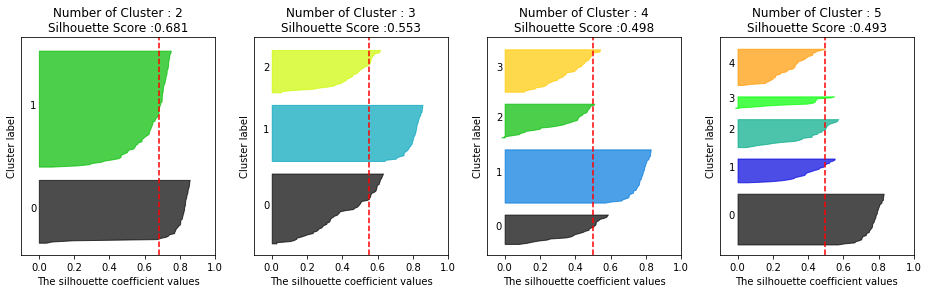

In [ ]:
from sklearn.datasets import load_iris
iris = load_iris()
visualize_silhouette([2,3,4,5], iris.data)

#2가 좋아보임

##**평균 이동**
###**평균 이동 Mean Shift의 개요**
- 평균 이동 : K-평균과 유사하게 중심을 군집의 중심으로 지속적으로 움직이면서 군집화 수행
  - K-평균이 중심에 소속된 데이터의 평균 거리 중심으로 이동하는 데 반해, 평균 이동은 중심을 데이터가 모여 있는 밀도가 가장 높은 곳으로 이동시킴
  - 데이터의 분포도를 이용해 군집 중심점 찾음, 확률 밀도 함수 이용, KDE 이용
  - KDE Kernal Density Estimation 는 커널 함수를 통해 어떤 변수의 확률 밀도 함수를 측정, 관측된 데이터 각각에 커널 함수를 적용한 값을 모두 더한 뒤 데이터 건수로 나눠 확률 밀도 함수 측정
    - 확률밀도함수 PDF : 확률 변수의 분포를 나타내는 함수
    - 개별 관측 데이터에 커널 함수 적용한 뒤, 이 적용 값을 모두 더한 후 개별 관측 데이터의 건수로 나눠 확률 밀도 함수를 추정하며 대표적인 커널 함수로서 가우시안 분포 함수 사용
   $KDE = {1\over n} * \sum_{i=1}^nK_h(x-x_i) = {1 \over nh}\sum_{i=1}^nK({x-x_i \over h})$
   - K는 커널함수 x는 확률 변숫값, xi는 관측값, h는 대역폭-KDE 형태를 부드러운/뾰족한 형태로 평활화 하는데 적용
   - 대역폭이 클수록 적은 수의 군집 중심점을 가지며 대역폭이 적을수록 많은 수의 군집 중심점 가짐
- 최적의 bandwidth 찾기 위해 estimate_bandwidth() 제공


In [1]:
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.cluster import MeanShift

X, y = make_blobs(n_samples=200, n_features=2, centers=3, cluster_std=0.7, random_state=0)

meanshift = MeanShift(bandwidth=0.8)
cluster_labels = meanshift.fit_predict(X)
print('cluster labels 유형:', np.unique(cluster_labels))

cluster labels 유형: [0 1 2 3 4 5]


In [2]:
meanshift = MeanShift(bandwidth=1)
cluster_labels = meanshift.fit_predict(X)
print('cluster labels 유형:', np.unique(cluster_labels))

cluster labels 유형: [0 1 2]


In [3]:
from sklearn.cluster import estimate_bandwidth

bandwidth = estimate_bandwidth(X)
print('bandwidth 값 : ', round(bandwidth,3))

bandwidth 값 :  1.816


In [6]:
import pandas as pd

clusterDF = pd.DataFrame(data=X, columns=['ftr1','ftr2'])
clusterDF['target'] = y

#estimate_bandwidth()로 최적의 bandwidth 계산
best_bandwidth = estimate_bandwidth(X)

meanshift = MeanShift(bandwidth=best_bandwidth)
cluster_labels = meanshift.fit_predict(X)
print('cluster labels 유형:', np.unique(cluster_labels))

cluster labels 유형: [0 1 2]


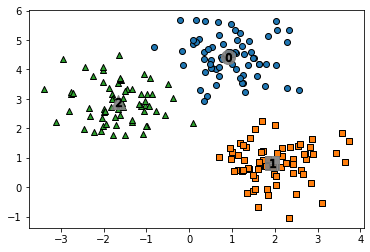

In [9]:
#시각화
import matplotlib.pyplot as plt
%matplotlib inline

clusterDF['meanshift_label'] = cluster_labels
centers = meanshift.cluster_centers_
unique_labels = np.unique(cluster_labels)
markers = ['o','s','^','x','*']

for label in unique_labels:
  label_cluster = clusterDF[clusterDF['meanshift_label']==label]
  center_x_y = centers[label]

  #군집별로 다른 마커로 산점도 적용
  plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], edgecolor='k', marker=markers[label])

  #군집별 중심 표현
  plt.scatter(x=center_x_y[0], y=center_x_y[1], s=200, color='gray', alpha=0.9, marker=markers[label])
  plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k', edgecolor='k', marker='$%d$' % label)

plt.show()

In [10]:
print(clusterDF.groupby('target')['meanshift_label'].value_counts())

target  meanshift_label
0       0                  67
1       1                  67
2       2                  66
Name: meanshift_label, dtype: int64
